# **Building Intelligent Agents with Langraph and LLMstudio**

In this tutorial, you'll learn how to build a powerful, flexible agent using **Langraph** and **LLMstudio**.
By the end, you'll understand how to centralize access to various **Large Language Models (LLMs)** through LLMstudio and
equip your agents with the ability to use external tools like weather APIs. This is particularly useful for building AI agents
that can handle diverse tasks in parallel, improving response times and efficiency.

### **What You Will Learn:**
- How to set up **LLMstudio** to manage and route LLM models.
- How to define tools your agent can use to extend its functionality.
- How to build a pre-built agent that integrates with tools.
- How to enable **parallel tool calls** for efficient agent behavior.

### **Why This Matters:**
In real-world applications, agents often need to interact with multiple tools, switch between different LLM models, and
handle tasks simultaneously. By centralizing LLM access and making tools available, you can make your agent smarter, more
versatile, and faster. **LLMstudio** acts as a router that streamlines these interactions, ensuring your agent can perform
complex tasks with ease.

## **Step 1: Importing Dependencies**

In this section, we will import the essential libraries and modules needed for our LLM agent. **Langraph** is used to build the agent, while **LLMstudio** allows us to route different models efficiently.

**Libraries imported:**
- `llmstudio.providers`: Provides the access to various LLMs.
- `llmstudio.langchain`: Helps in integrating with the LangChain framework.
- `langgraph.prebuilt`: Enables building a pre-configured agent with common utilities.
- `IPython.display`: Allows embedding images within Jupyter notebooks.

In [ ]:
from llmstudio.providers import LLM
from llmstudio.langchain import ChatLLMstudio
from langgraph.prebuilt import create_react_agent
from langchain_core.tools import tool
from langchain_core.messages import ToolMessage, HumanMessage, AIMessage
from IPython.display import Image
from typing import Literal

## **Step 2: Setting Up the LLMstudio Client**

In this step, we initialize the **LLMstudio** client with the `openai` model.
This sets up our environment for interacting with various models like **GPT-4o-mini**.

**Why this is important:**
By centralizing LLM management through **LLMstudio**, we streamline the process of switching between models and providers.

In [ ]:
llm = LLM("openai")
model = ChatLLMstudio(llm=llm, model="gpt-4o-mini")

## **Step 3: Defining a Basic Tool**

Here we define a simple tool called `get_weather` which accepts a city as input and returns weather information for that city.

### Code Breakdown:
- `@tool`: This decorator registers a function as a tool usable by the agent.
- **Functionality**: The function responds with weather information based on whether the input city is `nyc` or `sf`.

In [ ]:
@tool
def get_weather(city: Literal["nyc", "sf"]):
    """Use this to get weather information."""
    if city == "nyc":
        return "It might be cloudy in nyc"
    elif city == "sf":
        return "It's always sunny in sf"

tools = [get_weather]

## **Step 4: Creating a Pre-built Agent**

Now, we create a **pre-built agent** using **langraph's `create_react_agent`** method, which facilitates building an agent with the required capabilities, like using tools and responding with AI-generated messages.

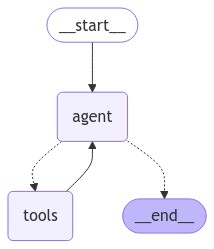

In [ ]:
graph = create_react_agent(model, tools=tools)

# Visualize graph as image
Image(graph.get_graph().draw_mermaid_png())

### Running a sample query

Let's quickly define a function to help us visualize our agent's thoughts and ask a simple question

In [ ]:
def pretty_print_conversation(conversation):
    for message in conversation['messages']:
        if isinstance(message, HumanMessage):
            print(f"User: {message.content}")
        elif isinstance(message, AIMessage):
            if message.content:
                print(f"AI: {message.content}")
            else:
                for tool_call in message.additional_kwargs.get('tool_calls', []):
                    print(f"AI (Tool Call): {tool_call['function']['name']} with args {tool_call['function']['arguments']}")
        elif isinstance(message, ToolMessage):
            print(f"Tool ({message.name}): {message.content}")


inputs = {"messages": [("user", "what is the weather in sf")]}
pretty_print_conversation(graph.invoke(inputs, stream_mode="values"))

User: what is the weather in sf
AI (Tool Call): get_weather with args {"city":"sf"}
Tool (get_weather): It's always sunny in sf
AI: The weather in San Francisco is always sunny!


## **Step 5: Parallel Tool Call Example**

In this step, we showcase an advanced capability of the **LLMstudio router**, which allows for parallel tool calls.

**Key Advantage:**
By leveraging parallelism, we can call multiple tools at once, saving time and making the agent more efficient, especially when dealing with complex tasks.

In [ ]:
inputs = {"messages": [("user", "what is the weather in ny and in sf")]}
pretty_print_conversation(graph.invoke(inputs, stream_mode="values"))

User: what is the weather in ny and in sf
AI (Tool Call): get_weather with args {"city": "nyc"}
AI (Tool Call): get_weather with args {"city": "sf"}
Tool (get_weather): It might be cloudy in nyc
Tool (get_weather): It's always sunny in sf
AI: The weather in NYC might be cloudy, while it's always sunny in San Francisco.
